Tenemos un data set variado sobre distintos habitos de los estudiantes

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

data = pd.read_csv("./exams.csv")
data.rename(columns={'race/ethnicity':'race', 'parental level of education':'parent_education', 'test preparation course':'prep_course', 'math score':'math_score', 'reading score':'reading_score','writing score':'writing_score'}, inplace=True)
data.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Data exploration

In [7]:
# cantidad de datos nulls
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [43]:
columnas = data.columns

In [44]:
def uniqueValues(dataframe, id_column):
    print(f'data column: {dataframe.columns[id_column]}')
    print(f'{np.unique(dataframe[dataframe.columns[id_column]] )}')

In [45]:
for i in range(len(data.columns)):
    uniqueValues(data, i)

data column: gender
['female' 'male']
data column: race
['group A' 'group B' 'group C' 'group D' 'group E']
data column: parent_education
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
data column: lunch
['free/reduced' 'standard']
data column: prep_course
['completed' 'none']
data column: math_score
[ 15  20  21  23  24  25  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100]
data column: reading_score
[ 25  27  30  32  33  34  35  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 10

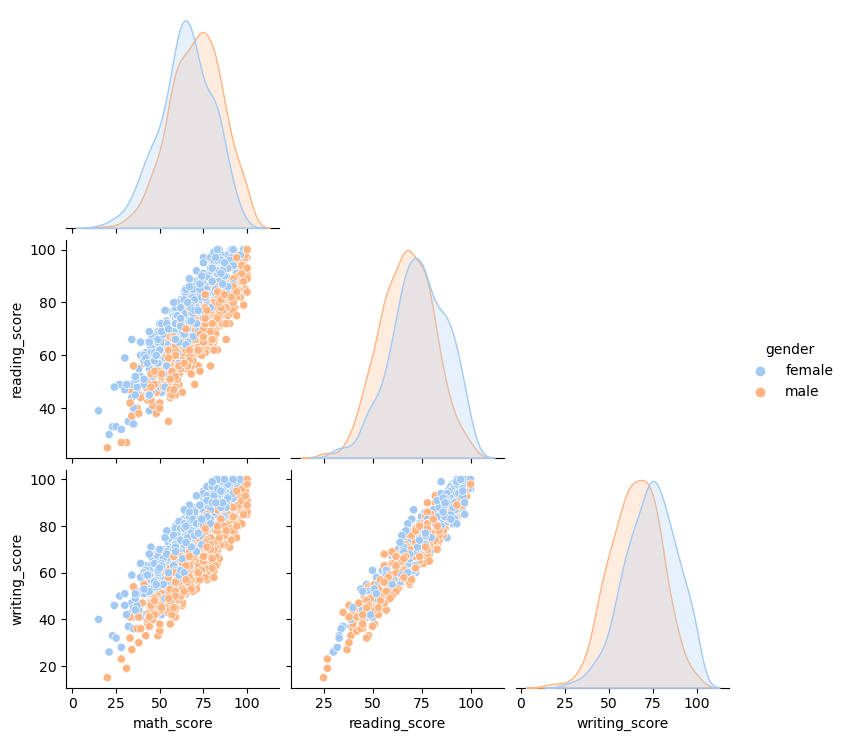

In [46]:
sns.pairplot(data, hue="gender", corner=True)

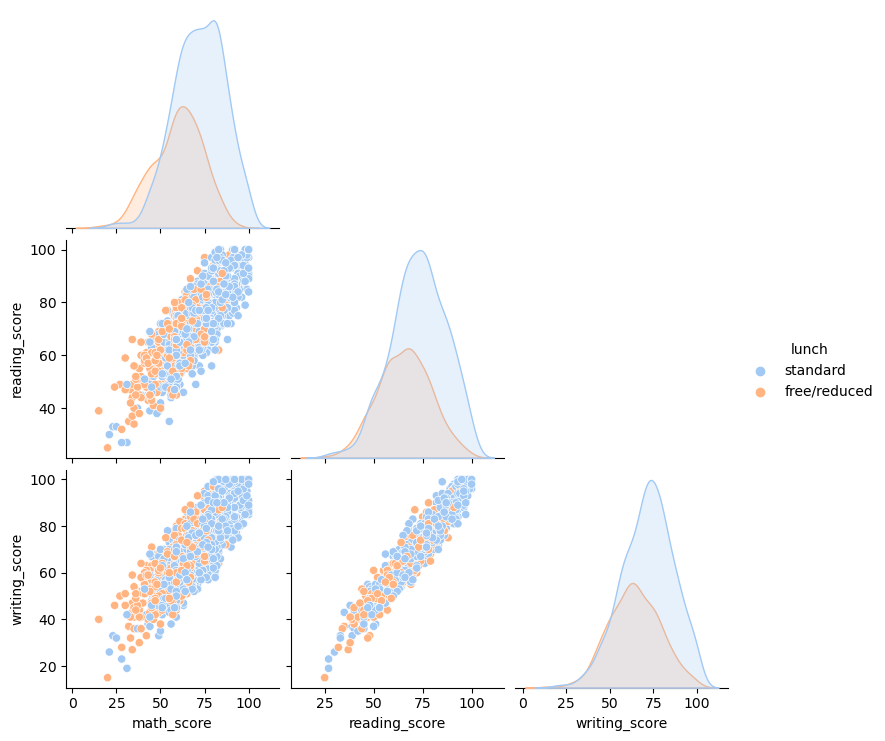

In [47]:
sns.pairplot(data, hue="lunch", corner=True)

puede haber una correlacion en que una persona con mas dinero para comida puede tener una mejor relacion; por ello no podemos sacar muchas conclusione

<AxesSubplot:xlabel='math_score', ylabel='Density'>

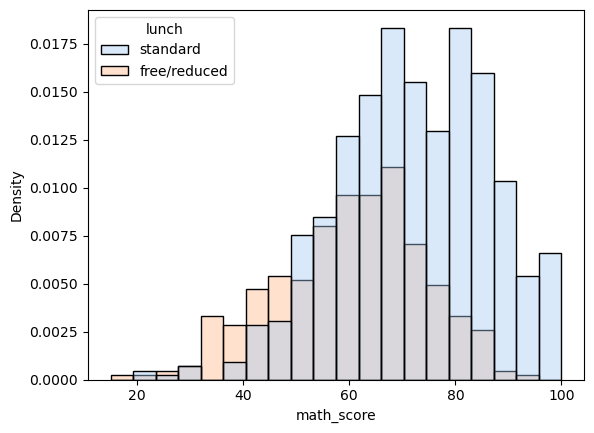

In [52]:
# veamos el histograma entre lso datos
sns.histplot(data=data, hue='lunch', x='math_score', alpha=0.4, stat='density')

# https://seaborn.pydata.org/generated/seaborn.histplot.html

## Analisis de los datos

In [65]:
from sklearn.preprocessing import LabelEncoder
# lo usaremos para cambiar etiquetas unicas a numero

le_g = LabelEncoder();
data.gender = le_g.fit_transform(data.gender);

le_r = LabelEncoder();
data.race = le_r.fit_transform(data.race);

le_pe = LabelEncoder();
data.parent_education = le_pe.fit_transform(data.parent_education);

le_lunch = LabelEncoder();
data.lunch = le_lunch.fit_transform(data.lunch);

le_pc = LabelEncoder();
data.prep_course = le_pc.fit_transform(data.prep_course);



In [67]:
data.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
